# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Fraud class distribution:
 fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


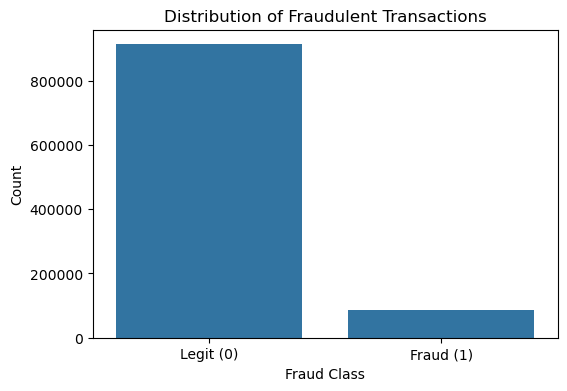

Percentage of Fraudulent Transactions: 8.74%
The dataset is imbalanced.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_counts = fraud['fraud'].value_counts()
print("Fraud class distribution:\n", fraud_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks([0,1], ['Legit (0)', 'Fraud (1)'])
plt.xlabel("Fraud Class")
plt.ylabel("Count")
plt.title("Distribution of Fraudulent Transactions")
plt.show()

fraud_percentage = fraud_counts[1] / fraud_counts.sum() * 100
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")

if fraud_percentage < 40:  # Generally, <40% is considered imbalanced
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    182519
         1.0       0.59      0.95      0.72     17481

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f} (Important for fraud detection)")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9368
Precision: 0.5858
Recall: 0.9457 (Important for fraud detection)
F1 Score: 0.7235


In [6]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

logreg_oversampled = LogisticRegression(class_weight='balanced', random_state=42)
logreg_oversampled.fit(X_resampled, y_resampled)

y_pred_oversampled = logreg_oversampled.predict(X_test)
print("Classification Report after Oversampling:\n", classification_report(y_test, y_pred_oversampled))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report after Oversampling:
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    182519
         1.0       0.58      0.94      0.72     17481

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000



In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

logreg_undersampled = LogisticRegression(class_weight='balanced', random_state=42)
logreg_undersampled.fit(X_resampled, y_resampled)

y_pred_undersampled = logreg_undersampled.predict(X_test)
print("Classification Report after Undersampling:\n", classification_report(y_test, y_pred_undersampled))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report after Undersampling:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.57      0.95      0.71     17481

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

logreg_smote = LogisticRegression(class_weight='balanced', random_state=42)
logreg_smote.fit(X_resampled, y_resampled)

y_pred_smote = logreg_smote.predict(X_test)
print("Classification Report after SMOTE:\n", classification_report(y_test, y_pred_smote))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report after SMOTE:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.57      0.94      0.71     17481

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

